In [2]:
import pandas as pd
import numpy as np

bins=10


In [3]:
import utils
data = utils.load_data([
    "../results/synthetic/1000/set1/"
])

In [17]:
data["disc_ps1"] = pd.cut(data.ps1, bins=bins)
data["quant_ps1"] = pd.qcut(data.ps1, q=bins, duplicates="drop")

exact = data[data.method == "exact"]
ps1_1 = data[(data.method == "EMCC") & (data.ps1 >= 1.0) & (data.selector)]

# add excat column to all rows
data2 = data.merge(exact[["file", "pns_l", "pns_u"]], on="file")


data2["r_pns_l"] = (data2.pns_l_x - data2.pns_l_y)
data2["r_pns_u"] = (data2.pns_u_x - data2.pns_u_y)


<AxesSubplot:title={'center':'r_pns_l'}, xlabel='disc_ps1'>

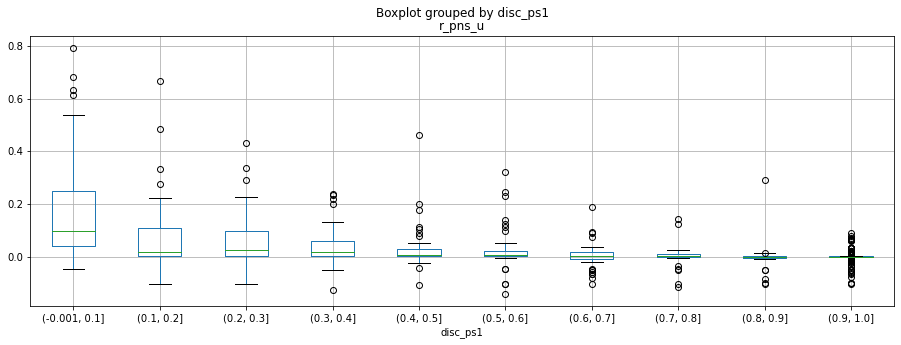

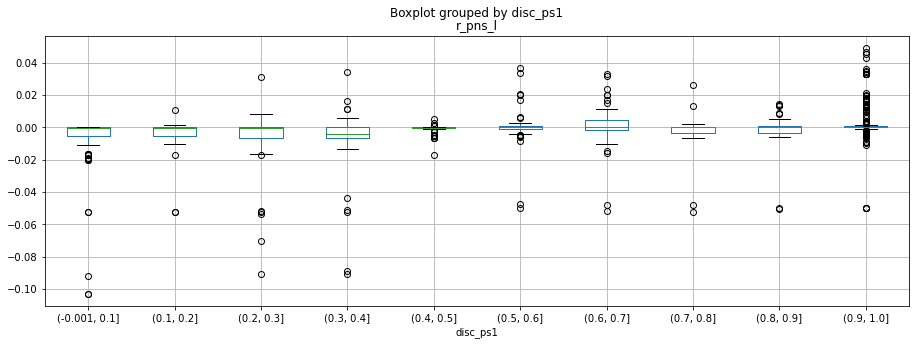

In [22]:
data2.boxplot("r_pns_u", by="disc_ps1", figsize=(15,5))
data2.boxplot("r_pns_l", by="disc_ps1", figsize=(15,5))

1.0